<a href="https://colab.research.google.com/github/heidynd/Dicoding-Machine-Learning-for-Beginner/blob/main/heidy_ML_submission.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
jupyter notebook --NotebookApp.allow_origin='https://colab.research.google.com' --port=8888 --NotebookApp.port_retries=0 
#terminal to connect jupyter and colab

# Setup

In [ ]:
!wget https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip

--2021-04-30 07:17:19--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘rockpaperscissors.zip’

rockpaperscissors.z 100%[===================>] 307.92M  1.33MB/s    in 3m 49s  

2021-04-30 07:21:08 (1.35 MB/s) - ‘rockpaperscissors.zip’ saved [322873683/322873683]



In [ ]:
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout 
import numpy as np
from keras_preprocessing import image
from keras.callbacks import EarlyStopping, ModelCheckpoint, Callback
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from google.colab import files

In [ ]:
!unzip rockpaperscissors.zip

In [ ]:
base_dir = 'rockpaperscissors/rps-cv-images'
os.listdir(base_dir)

['scissors', 'paper', 'rock', 'README_rpc-cv-images.txt']

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    horizontal_flip=True,
    shear_range=0.2,
    fill_mode='wrap',
    validation_split=0.4
)


In [ ]:
train_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(150,150),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(150,150),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

Found 1314 images belonging to 3 classes.
Found 874 images belonging to 3 classes.


# Archi fix buat Submission

In [ ]:
# archi fix

model = Sequential()
model.add(Conv2D(16, (3,3), activation='relu', padding='same', input_shape=(150, 150, 3)))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(32, (3,3), activation='relu', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64, (3,3), activation='relu', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128, (3,3), activation='relu', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(256, (3,3), activation='relu', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(3, activation='softmax'))
#model.summary()

#proses compile
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

# callback
#early_stop = EarlyStopping(monitor='val_loss', mode='min', patience=4, verbose= 1)
cek_point = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode= 'max', save_best_only=True)

class ThresholdCallback(Callback):
  def __init__(self, threshold):
    super(ThresholdCallback, self).__init__()
    self.threshold = threshold

  def on_epoch_end(self, epoch, logs=None):
    val_acc = logs['val_accuracy']

    if (val_acc) > self.threshold:
      self.model.stop_training = True

call = ThresholdCallback(threshold=0.99)

model.fit(
    train_generator,
    steps_per_epoch=25, # berapa batch yang akan dieksekusi pada setiap epoch
    epochs=20, # tambahkan eposchs jika akurasi model belum optimal
    validation_data=validation_generator, # menampilkan akurasi pengujian data validasi
    validation_steps=5, # berapa batch yang akan dieksekusi pada setiap epoch
    verbose=2,
    callbacks=[call, cek_point]
)

Epoch 1/20
25/25 - 7s - loss: 1.1708 - accuracy: 0.3922 - val_loss: 0.9614 - val_accuracy: 0.3750
Epoch 2/20
25/25 - 6s - loss: 0.8398 - accuracy: 0.6247 - val_loss: 0.4977 - val_accuracy: 0.8438
Epoch 3/20
25/25 - 6s - loss: 0.5614 - accuracy: 0.7610 - val_loss: 0.4120 - val_accuracy: 0.8438
Epoch 4/20
25/25 - 6s - loss: 0.4329 - accuracy: 0.8403 - val_loss: 0.3256 - val_accuracy: 0.8875
Epoch 5/20
25/25 - 6s - loss: 0.3924 - accuracy: 0.8714 - val_loss: 0.3092 - val_accuracy: 0.9125
Epoch 6/20
25/25 - 6s - loss: 0.2504 - accuracy: 0.9169 - val_loss: 0.2682 - val_accuracy: 0.9250
Epoch 7/20
25/25 - 6s - loss: 0.2468 - accuracy: 0.9175 - val_loss: 0.1907 - val_accuracy: 0.9375
Epoch 8/20
25/25 - 6s - loss: 0.2255 - accuracy: 0.9137 - val_loss: 0.1677 - val_accuracy: 0.9438
Epoch 9/20
25/25 - 6s - loss: 0.1797 - accuracy: 0.9438 - val_loss: 0.2371 - val_accuracy: 0.9500
Epoch 10/20
25/25 - 6s - loss: 0.1749 - accuracy: 0.9429 - val_loss: 0.2248 - val_accuracy: 0.9187
Epoch 11/20
25/25 -

Saving batu.png to batu (1).png
batu.png
1
rock


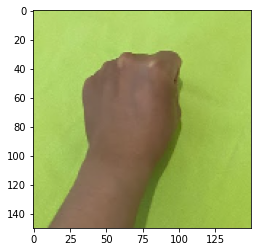

In [ ]:
# prediksi images

uploaded = files.upload()
pred_class= train_generator.class_indices

 
for fn in uploaded.keys():
  path = fn
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
 
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  prediction = np.argmax(classes)
  print(fn)
  print(prediction)
  for key, value in pred_class.items():
    if value == prediction:
      print(key)

**Data Diri**

- Nama = Heidy Indrayani
- Email = heidy.indrayani@gmail.com
- Kota = Surabaya

# **Archi Ragu2**

In [ ]:
try_model = Sequential()
try_model.add(Conv2D(16, (3,3), activation='relu', padding='same', input_shape=(150, 150, 3)))
try_model.add(MaxPooling2D(2,2))
try_model.add(Conv2D(32, (3,3), activation='relu', padding='same'))
try_model.add(MaxPooling2D(2,2))
try_model.add(Conv2D(64, (3,3), activation='relu', padding='same'))
try_model.add(MaxPooling2D(2,2))
try_model.add(Conv2D(128, (3,3), activation='relu', padding='same'))
try_model.add(MaxPooling2D(2,2))
try_model.add(Conv2D(256, (3,3), activation='relu', padding='same'))
try_model.add(MaxPooling2D(2,2))
try_model.add(Flatten())
try_model.add(Dense(512, activation='relu'))
try_model.add(Dropout(0.2))
try_model.add(Dense(3, activation='softmax'))
#model.summary()

#proses compile
try_model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

# callback
early_stop = EarlyStopping(monitor='val_loss', mode='min', patience=5, verbose= 1)
cek_point = ModelCheckpoint('best_modell.h5', monitor='val_accuracy', mode= 'max', save_best_only=True)

class ThresholdCallback(Callback):
  def __init__(self, threshold):
    super(ThresholdCallback, self).__init__()
    self.threshold = threshold

  def on_epoch_end(self, epoch, logs=None):
    acc = logs['accuracy']
    val_acc = logs['val_accuracy']
    #if (acc && val_acc) > self.threshold:
    #if (acc > self.threshold & val_acc > self.threshold): ini bakal error karna & itu untuk bitwise
    if (acc > self.threshold and val_acc > self.threshold):
      self.model.stop_training = True

call = ThresholdCallback(threshold=0.90)

try_model.fit(
    train_generator,
    steps_per_epoch=25, # berapa batch yang akan dieksekusi pada setiap epoch
    epochs=20, # tambahkan eposchs jika akurasi model belum optimal
    validation_data=validation_generator, # menampilkan akurasi pengujian data validasi
    validation_steps=5, # berapa batch yang akan dieksekusi pada setiap epoch
    verbose=2,
    callbacks=[call, cek_point]
)

Epoch 1/20
25/25 - 7s - loss: 1.1139 - accuracy: 0.3494 - val_loss: 1.1349 - val_accuracy: 0.2500
Epoch 2/20
25/25 - 6s - loss: 0.9787 - accuracy: 0.5182 - val_loss: 0.9805 - val_accuracy: 0.6313
Epoch 3/20
25/25 - 6s - loss: 0.5296 - accuracy: 0.8351 - val_loss: 0.3394 - val_accuracy: 0.8438
Epoch 4/20
25/25 - 6s - loss: 0.3794 - accuracy: 0.8623 - val_loss: 0.4254 - val_accuracy: 0.8625
Epoch 5/20
25/25 - 6s - loss: 0.3821 - accuracy: 0.8636 - val_loss: 0.2354 - val_accuracy: 0.9312
Epoch 6/20
25/25 - 6s - loss: 0.2630 - accuracy: 0.9039 - val_loss: 0.2238 - val_accuracy: 0.9187


Saving batu.png to batu (3).png
batu.png
0
paper


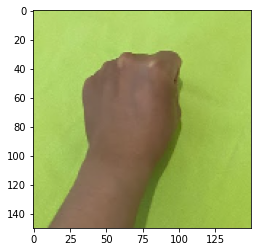

In [ ]:
# prediksi images

uploaded = files.upload()
pred_class= train_generator.class_indices

 
for fn in uploaded.keys():
  path = fn
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
 
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  prediction = np.argmax(classes)
  print(fn)
  print(prediction)
  for key, value in pred_class.items():
    if value == prediction:
      print(key)

# **Archi Gagal**

In [ ]:
model = Sequential()
model.add(Conv2D(64, (3,3), activation='relu', padding='same', input_shape=(150, 150, 3)))
model.add(Conv2D(64, (3,3), activation='relu', padding='same'))
model.add(MaxPooling2D(2,2))
#model.add(Conv2D(128, (3,3), activation='relu', padding='same'))
model.add(Conv2D(128, (3,3), activation='relu', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(256, (3,3), activation='relu', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
#model.add(Dropout(0.2))
model.add(Dense(3, activation='softmax'))
#model.summary()

#proses compile
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

# callback
early_stop = EarlyStopping(monitor='val_loss', mode='min')
cek_point = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode= 'max', save_best_only=True)


model.fit(
    train_generator,
    steps_per_epoch=25, # berapa batch yang akan dieksekusi pada setiap epoch
    epochs=20, # tambahkan eposchs jika akurasi model belum optimal
    validation_data=validation_generator, # menampilkan akurasi pengujian data validasi
    validation_steps=5, # berapa batch yang akan dieksekusi pada setiap epoch
    verbose=2,
    #callbacks=[cek_point]
)

Epoch 1/20
25/25 - 9s - loss: 4.8699 - accuracy: 0.4062 - val_loss: 0.9499 - val_accuracy: 0.5750
Epoch 2/20
25/25 - 6s - loss: 1.1089 - accuracy: 0.5506 - val_loss: 0.8467 - val_accuracy: 0.7125
Epoch 3/20
25/25 - 6s - loss: 0.8128 - accuracy: 0.6519 - val_loss: 0.6592 - val_accuracy: 0.6938
Epoch 4/20
25/25 - 6s - loss: 0.5570 - accuracy: 0.7937 - val_loss: 0.4225 - val_accuracy: 0.8500
Epoch 5/20
25/25 - 6s - loss: 0.8545 - accuracy: 0.8117 - val_loss: 0.2778 - val_accuracy: 0.9000
Epoch 6/20
25/25 - 6s - loss: 0.3061 - accuracy: 0.8805 - val_loss: 0.2358 - val_accuracy: 0.9187
Epoch 7/20
25/25 - 6s - loss: 0.2947 - accuracy: 0.8863 - val_loss: 0.1831 - val_accuracy: 0.9438
Epoch 8/20
25/25 - 6s - loss: 0.2126 - accuracy: 0.9156 - val_loss: 0.1911 - val_accuracy: 0.9375
Epoch 9/20
25/25 - 6s - loss: 0.2475 - accuracy: 0.9182 - val_loss: 0.1870 - val_accuracy: 0.9375
Epoch 10/20
25/25 - 6s - loss: 0.2394 - accuracy: 0.9195 - val_loss: 0.2756 - val_accuracy: 0.8813
Epoch 11/20
25/25 -

In [ ]:
from keras import applications
from tensorflow.keras.models import Sequential, Model

base_model = applications.VGG16(weights='imagenet', include_top=False, input_shape=(150,150,3))

top_model = Sequential()
#top_model.add(Flatten(input_shape=base_model.output_shape[1:]))
top_model.add(Flatten(base_model.layers[-1].output))
top_model.add(Dense(512, activation='relu'))
top_model.add(Dropout(0.5))
top_model.add(Dense(3, activation='softmax'))

model = Model(inputs= base_model.input, outputs= top_model(base_model.output))

for layer in model.layers:
  layer.trainable = False

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])
model.fit(
    train_generator,
    steps_per_epoch=25, # berapa batch yang akan dieksekusi pada setiap epoch
    epochs=20, # tambahkan eposchs jika akurasi model belum optimal
    validation_data=validation_generator, # menampilkan akurasi pengujian data validasi
    validation_steps=5, # berapa batch yang akan dieksekusi pada setiap epoch
    verbose=2
)

AttributeError: ignored

gunting.png


ValueError: ignored

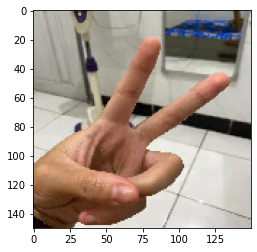

In [ ]:

# ambil gambar kamar
fn = 'gunting.png'

# predicting images
path = fn
img = image.load_img(path, target_size=(150,150))
imgplot = plt.imshow(img)
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)

images = np.vstack([x])
classes = model.predict(images, batch_size=10)
print